In [263]:
!pip3 install xgboost


    100% |████████████████████████████████| 109.8MB 10kB/s  eta 0:00:01   25% |████████▎                       | 28.4MB 934kB/s eta 0:01:28    39% |████████████▊                   | 43.5MB 1.7MB/s eta 0:00:39    41% |█████████████▎                  | 45.4MB 845kB/s eta 0:01:17    60% |███████████████████▍            | 66.6MB 2.6MB/s eta 0:00:17    72% |███████████████████████▍        | 80.1MB 38.4MB/s eta 0:00:01    90% |█████████████████████████████   | 99.5MB 551kB/s eta 0:00:19    98% |███████████████████████████████▌| 108.0MB 687kB/s eta 0:00:03
    100% |████████████████████████████████| 26.1MB 43kB/s eta 0:00:011  31% |██████████▏                     | 8.3MB 1.8MB/s eta 0:00:11    77% |████████████████████████▊       | 20.2MB 44.6MB/s eta 0:00:01    94% |██████████████████████████████  | 24.5MB 1.1MB/s eta 0:00:02
    100% |████████████████████████████████| 20.2MB 52kB/s eta 0:00:01   17% |█████▊                          | 3.6MB 1.5MB/s eta 0:00:11    22% |███████▎               

In [267]:
conda install -c anaconda py-xgboost


Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import xgboost
%matplotlib inline

In [290]:
df_train = pd.read_excel('/home/sk-ji/Downloads/Doctor_fee_consultation/Final Participant Data Folder/Final_Train.xlsx')
df_test = pd.read_excel('/home/sk-ji/Downloads/Doctor_fee_consultation/Final Participant Data Folder/Final_Test.xlsx')


In [291]:
df_train["type"]="train"
df_test["type"]="test"

In [292]:
df_train.head()
df_test.head()
df_train.shape
df_test.shape


(1987, 7)

In [293]:
df = pd.concat([df_train,df_test],ignore_index= True)

/home/sk-ji/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [294]:
df.head()
# df.shape

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,type
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%,train
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,train
2,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN,train
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN,train
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%,train


In [295]:
df['type'].value_counts()

train    5961
test     1987
Name: type, dtype: int64

### cheacking missing values

In [296]:
df.isnull().sum()

Experience               0
Fees                  1987
Miscellaneous_Info    3454
Place                   31
Profile                  0
Qualification            0
Rating                4392
type                     0
dtype: int64

### ploting missing values

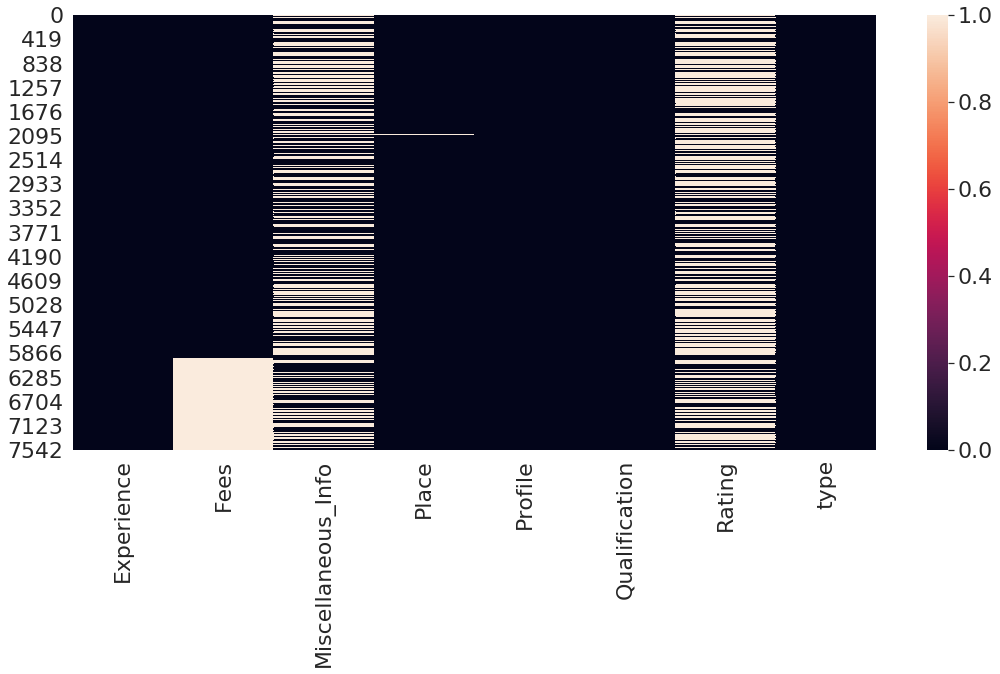

In [297]:
sns.set(font_scale=2)
plt.figure(figsize=(18,8))
sns.heatmap(df.isnull())

In [298]:
df.dtypes

Experience             object
Fees                  float64
Miscellaneous_Info     object
Place                  object
Profile                object
Qualification          object
Rating                 object
type                   object
dtype: object

In [299]:
df["Fees"].fillna(df['Fees'].mean(),inplace=True)


In [300]:
NA = 'NA'
df["Miscellaneous_Info"].fillna(NA,inplace=True)


In Place Column only 31 values are missing so we can impute them as others

In [301]:
Others = 'Others'
df["Place"].fillna(Others,inplace=True)


To treat the missing value of Rating we can impute the average rating to it before this we need to convert this in int or float dtypes

In [302]:
df["Rating"]=df["Rating"].str.strip("%")

In [303]:
df["Rating"].head()

0    100
1     98
2    NaN
3    NaN
4    100
Name: Rating, dtype: object

In [304]:
df["Rating"]=df["Rating"].astype(float)


In [305]:
df["Rating"].dtypes

dtype('float64')

In [306]:
#now treating the missing values in rating
df["Rating"].fillna(50,inplace=True)


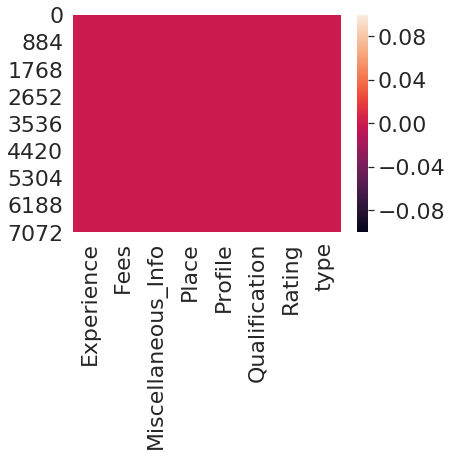

In [307]:
sns.heatmap(df.isnull())

In [308]:
df["Experience"]=df["Experience"].str.strip(" years experience")

In [309]:
df.head()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,type
0,24,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100.0,train
1,12,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98.0,train
2,9,300.0,NA,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",50.0,train
3,12,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",50.0,train
4,20,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100.0,train


In [310]:
df['Profile'].value_counts()

Dentist             1838
General Medicine    1617
Dermatologists      1373
Homeopath           1120
Ayurveda            1037
ENT Specialist       963
Name: Profile, dtype: int64

In [311]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Profile'] = encoder.fit_transform(df['Profile'])
df['Profile'].value_counts()


1    1838
4    1617
2    1373
5    1120
0    1037
3     963
Name: Profile, dtype: int64

In [312]:
df['Qualification'].unique()


array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Medicine, Post Graduate Diploma in Diabetology (PGDD), MBBS, FRCP - Internal Medicine',
       'MBBS, MS - General Surgery, FAIS, FIAGES',
       'MBBS, MD / MS - Obstetrics & Gynaecology'], dtype=object)

In [313]:
# sss['Qualification'].str.split()

In [314]:
df['Qual_1'] = df['Qualification'].str.split(',').str[0]
df['Qual_1']

0                    BHMS
1                    BAMS
2                    MBBS
3           BSc - Zoology
4                    BAMS
              ...        
7943                 BAMS
7944    MD - Dermatology 
7945                 MBBS
7946                  BDS
7947                 MBBS
Name: Qual_1, Length: 7948, dtype: object

In [315]:
df['Qual_2'] = df['Qualification'].str.split(',').str[1]
df['Qual_2']

0                           MD - Homeopathy
1                    MD - Ayurveda Medicine
2                  MS - Otorhinolaryngology
3                                      BAMS
4                                       NaN
                       ...                 
7943                     Doctor of Medicine
7944                  Venereology & Leprosy
7945     MD / MS - Obstetrics & Gynaecology
7946                                    NaN
7947                      MD - Dermatology 
Name: Qual_2, Length: 7948, dtype: object

In [316]:
df['Qual_3'] = df['Qualification'].str.split(',').str[2]
df['Qual_3']

0                          NaN
1                          NaN
2                          NaN
3                          NaN
4                          NaN
                 ...          
7943                       NaN
7944                      MBBS
7945                       NaN
7946                       NaN
7947     Venereology & Leprosy
Name: Qual_3, Length: 7948, dtype: object

In [317]:
# df.head()
df[['Qual_1','Qual_2','Qual_3']].head(20)

,Qual_1,Qual_2,Qual_3
0,BHMS,MD - Homeopathy,NaN
1,BAMS,MD - Ayurveda Medicine,NaN
2,MBBS,MS - Otorhinolaryngology,NaN
3,BSc - Zoology,BAMS,NaN
4,BAMS,NaN,NaN
5,BAMS,NaN,NaN
6,BHMS,NaN,NaN
7,BDS,NaN,NaN
8,MBBS,MD - General Medicine,NaN
9,BSc,BDS,NaN


In [318]:
df['Qual_3'].nunique()

481

### refining Place to single column City

In [319]:
df['city'] = df['Place'].str.split(',').apply(lambda x: x[-1])


In [320]:
df['city'].isnull().sum()

0

In [321]:
df = df.drop(['Place'],axis=1)

In [322]:
df['Qualification'].head(50)

0                                 BHMS, MD - Homeopathy
1                          BAMS, MD - Ayurveda Medicine
2                        MBBS, MS - Otorhinolaryngology
3                                   BSc - Zoology, BAMS
4                                                  BAMS
5                                                  BAMS
6                                                  BHMS
7                                                   BDS
8                           MBBS, MD - General Medicine
9                                              BSc, BDS
10                                  MBBS, MS, DNB - ENT
11                                                 BAMS
12                                             BDS, MDS
13              BDS, MDS - Oral & Maxillofacial Surgery
14    MBBS, Diploma in Otorhinolaryngology (DLO), DN...
15                          MBBS, MD - General Medicine
16           MBBS, Diploma in Otorhinolaryngology (DLO)
17                                 MBBS, MF- Hom

In [323]:
# df['Misc'] = df['Miscellaneous_Info'].str.split('%').str[0]
# df['Misc']

In [324]:
# df['Misc_len'] = df['Misc'].str.len()
# df['Misc_len']

In [325]:
# df.loc[df['Misc_len']>3, 'Misc'] = 0

In [326]:
# df['Misc'].fillna(0,inplace = True)


In [327]:
# df['Misc'].replace('NA',np.NaN)

In [328]:
# df['Misc'].fillna(0,inplace = True)


In [329]:
# df['Misc'] = df['Misc'].replace(NA,0)

In [330]:
# df['Misc'] = df['Misc'].replace({ 'NA' : 0 },inplace= True)
# df['Misc'] = df['Misc'].astype(int)

In [331]:
# df['Misc'] = df['Misc'].astype(float)

In [332]:
# df['Misc_2'] = df['Miscellaneous_Info'].str.split('% ').str[1]


In [333]:
# df['Misc_2']

In [334]:
# df['Misc_3'] = df['Misc_2'].str.split(' ').str[0]


In [335]:
# df['Misc_3']

In [336]:
# df['Misc_3'].fillna(0,inplace = True)


In [337]:
# df['Misc_3_len'] = df['Misc_3'].str.len()


In [338]:
# df['Misc_3_len']

In [339]:
# df.loc[df['Misc_3_len']>3, 'Misc_3'] = 0


In [340]:
# df.loc[df['Misc_3']==',', 'Misc_3'] = 0


In [341]:
# df['Misc_3_len']

In [342]:
# df['Misc_3'] = df['Misc_3'].astype(int)

In [343]:
df

,Experience,Fees,Miscellaneous_Info,Profile,Qualification,Rating,type,Qual_1,Qual_2,Qual_3,city
0,24,100.00000,"100% 16 Feedback Kakkanad, Ernakulam",5,"BHMS, MD - Homeopathy",100.0,train,BHMS,MD - Homeopathy,NaN,Ernakulam
1,12,350.00000,"98% 76 Feedback Whitefield, Bangalore",0,"BAMS, MD - Ayurveda Medicine",98.0,train,BAMS,MD - Ayurveda Medicine,NaN,Bangalore
2,9,300.00000,NA,3,"MBBS, MS - Otorhinolaryngology",50.0,train,MBBS,MS - Otorhinolaryngology,NaN,Bangalore
3,12,250.00000,"Bannerghatta Road, Bangalore ₹250 Available on...",0,"BSc - Zoology, BAMS",50.0,train,BSc - Zoology,BAMS,NaN,Bangalore
4,20,250.00000,"100% 4 Feedback Keelkattalai, Chennai",0,BAMS,100.0,train,BAMS,NaN,NaN,Chennai
...,...,...,...,...,...,...,...,...,...,...,...
7943,10,307.94464,NA,0,"BAMS, Doctor of Medicine",50.0,test,BAMS,Doctor of Medicine,NaN,Bangalore
7944,4,307.94464,NA,2,"MD - Dermatology , Venereology & Leprosy, MBBS",50.0,test,MD - Dermatology,Venereology & Leprosy,MBBS,Chennai
7945,9,307.94464,NA,4,"MBBS, MD / MS - Obstetrics & Gynaecology",50.0,test,MBBS,MD / MS - Obstetrics & Gynaecology,NaN,Chennai
7946,12,307.94464,RCT - Root Canal Treatment Root Canal Treatmen...,1,BDS,98.0,test,BDS,NaN,NaN,Bangalore


In [344]:
othr = 'others'
df['Qual_3'].fillna(othr,inplace=True)
df['Qual_2'].fillna(othr,inplace=True)
df['Qual_1'].fillna(othr,inplace=True)

In [345]:
df['Qual_1'] = encoder.fit_transform(df['Qual_1'])
df['Qual_2'] = encoder.fit_transform(df['Qual_2'])
df['Qual_3'] = encoder.fit_transform(df['Qual_3'])

In [346]:
df['city'] = encoder.fit_transform(df['city'])

In [347]:
df = df.drop(['Qualification','Miscellaneous_Info'],axis=1)

In [348]:
df_train = df.loc[df["type"]=="train"]
df_test = df.loc[df["type"]=="test"]


In [349]:
df_train = df_train.drop(['type'],axis=1)
df_test = df_test.drop(['type'],axis=1)

In [350]:
df_train

,Experience,Fees,Profile,Rating,Qual_1,Qual_2,Qual_3,city
0,24,100.0,5,100.0,8,293,481,4
1,12,350.0,0,98.0,5,282,481,0
2,9,300.0,3,50.0,101,383,481,0
3,12,250.0,0,50.0,14,10,481,0
4,20,250.0,0,100.0,5,495,481,1
...,...,...,...,...,...,...,...,...
5956,19,300.0,3,98.0,101,376,481,0
5957,33,100.0,4,50.0,101,495,481,1
5958,41,600.0,4,97.0,101,495,481,3
5959,15,100.0,4,90.0,101,290,481,6


In [351]:
df_x = df_train.drop(columns=["Fees"])
df_y = df_train[["Fees"]]


In [352]:
print(df_x,df_y)

     Experience  Profile  Rating  Qual_1  Qual_2  Qual_3  city
0            24        5   100.0       8     293     481     4
1            12        0    98.0       5     282     481     0
2             9        3    50.0     101     383     481     0
3            12        0    50.0      14      10     481     0
4            20        0   100.0       5     495     481     1
...         ...      ...     ...     ...     ...     ...   ...
5956         19        3    98.0     101     376     481     0
5957         33        4    50.0     101     495     481     1
5958         41        4    97.0     101     495     481     3
5959         15        4    90.0     101     290     481     6
5960         17        1   100.0       6     337     481     3

[5961 rows x 7 columns]        Fees
0     100.0
1     350.0
2     300.0
3     250.0
4     250.0
...     ...
5956  300.0
5957  100.0
5958  600.0
5959  100.0
5960  200.0

[5961 rows x 1 columns]


In [353]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x,columns=df_x.columns)

In [354]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.ensemble import VotingRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_log_error




In [355]:
results = pd.DataFrame(columns=['model','R2 Score','MAE','RMSE','mean error','median error','error score'])


In [356]:
models_name = ['linear regression','KNN','SVM(rbf)','decision tree','RandomForest','AdaBoost',
                'gradientboost','bagging',]

In [357]:
model_list = [LinearRegression(),KNeighborsRegressor(),SVR(),DecisionTreeRegressor(), RandomForestRegressor(),
              AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor()]

In [358]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV

In [359]:
kfold = KFold(n_splits=5,shuffle=True,random_state=100)

for idx,model in enumerate(model_list):
    score=cross_val_score(model,df_x,df_y,scoring='neg_mean_squared_log_error',cv=kfold,n_jobs=-1,verbose=1)
    x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,random_state=42,test_size=0.15)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    rscore=r2_score(y_test,y_pred)
    mse = mean_absolute_error(y_pred,y_test)
    rmse_scores = np.sqrt(-score)
    results.loc[idx] = [models_name[idx],rscore,mse,rmse_scores,score.mean(),np.median(score),score]

results    

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.1s finished
/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this

,model,R2 Score,MAE,RMSE,mean error,median error,error score
0,linear regression,0.102266,143.981511,"[0.6738580415307966, 0.6866659046537269, 0.691...",-0.454751,-0.454085,"[-0.45408466013572085, -0.4715100646139212, -0..."
1,KNN,0.073305,138.905028,"[0.6849419763123908, 0.685145607114301, 0.7042...",-0.469233,-0.469425,"[-0.46914551091472373, -0.469424502948024, -0...."
2,SVM(rbf),0.014753,150.506663,"[0.6900108760374444, 0.709154337312141, 0.7068...",-0.483310,-0.479075,"[-0.4761150090499614, -0.5028998741286218, -0...."
3,decision tree,-0.635321,172.454106,"[0.8417119118629031, 0.8278084094864004, 0.848...",-0.681730,-0.685267,"[-0.7084789425719036, -0.6852667628164041, -0...."
4,RandomForest,0.040649,139.682685,"[0.6919218334729454, 0.6879838084854129, 0.692...",-0.462169,-0.473322,"[-0.47875582363656244, -0.47332172073809325, -..."
5,AdaBoost,0.112019,145.163111,"[0.6970460064892869, 0.7110188558148561, 0.717...",-0.487046,-0.485873,"[-0.485873135162663, -0.5055478133242671, -0.5..."
6,gradientboost,0.205456,130.643349,"[0.6370467805878239, 0.6449991446152429, 0.653...",-0.402670,-0.405829,"[-0.405828600657311, -0.41602389655439503, -0...."
7,bagging,0.069630,138.287683,"[0.6820084539560628, 0.690966732063294, 0.6966...",-0.468465,-0.465136,"[-0.4651355312675391, -0.4774350248182279, -0...."


In [283]:
from sklearn.externals import joblib


/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [360]:
joblib.dump(KNeighborsRegressor,'project_18_knn.pkl')


['project_18_knn.pkl']